# 전이 학습 (Transfer Learning)
- 한 도메인에서 학습된 지식을 다른 관련 도메인에 적용하는 기술
- 모델을 학습시키는 데 있어서 데이터가 부족하거나 모델을 새로 만들기 어려울 때, 이미 학습된 모델을 사용하여 자신의 문제에 맞게 재학습하는 방법

##  주요 전이학습 기법

### 1. 파인 튜닝 (Fine-tuning)
- 사전 훈련된 모델의 일부 또는 전체 가중치를 새로운 작업에 맞게 조정합니다.
- 새로운 데이터셋으로 모델을 추가 학습시키는 방식입니다.
- 장점: 상대적으로 간단하고 효과적입니다.
- 단점: 대규모 모델의 경우 많은 컴퓨팅 자원이 필요할 수 있습니다.

### 2. LoRA (Low-Rank Adaptation)
- 대규모 언어 모델을 효율적으로 fine-tuning하기 위해 개발되었습니다.
- 모델의 가중치 매트릭스에 저랭크 행렬을 더하는 방식으로 작동합니다.
- 장점: 매우 적은 수의 파라미터만 학습하므로 효율적입니다.
- 특히 대규모 언어 모델에서 유용합니다.

### 3. 특징 추출 (Feature Extraction)
- 사전 훈련된 모델의 일부 레이어를 고정하고, 마지막 레이어만 새로운 작업에 맞게 학습시킵니다.
- 장점: 계산 비용이 적고, 과적합 위험이 낮습니다.
- 단점: 파인 튜닝에 비해 성능이 떨어질 수 있습니다.

### 4. 프롬프트 튜닝 (Prompt Tuning)
- 모델의 가중치는 고정하고, 입력 프롬프트만을 최적화합니다.
- 장점: 매우 적은 수의 파라미터만 학습하므로 효율적입니다.
- 특히 대규모 언어 모델에서 유용합니다.

### 5. 어댑터 (Adapters)
- 모델의 각 레이어에 작은 신경망(어댑터)을 추가합니다.
- 기존 모델 파라미터는 고정하고 어댑터만 학습합니다.
- 장점: 모델 아키텍처를 크게 변경하지 않고도 새로운 작업에 적응할 수 있습니다.

### 6. P-tuning
- 프롬프트 튜닝의 변형으로, 연속적인 프롬프트 임베딩을 학습합니다.
- 장점: 프롬프트 튜닝보다 더 유연하고 효과적일 수 있습니다.


- 이러한 방법들은 각각의 장단점이 있으며, 작업의 특성, 사용 가능한 컴퓨팅 자원, 데이터셋의 크기 등에 따라 선택됩니다. 
- 최근에는 대규모 언어 모델의 등장으로 LoRA, 프롬프트 튜닝 등의 효율적인 방법들이 주목받고 있습니다.


## Fine Tuning 의 주요 두 가지 방법
### 전체 모델 학습 (Full Fine-tuning)

- 특징
    - 사전 훈련된 모델의 모든 파라미터를 업데이트합니다.
    - 가장 유연한 방법으로, 모델 전체를 새로운 작업에 맞게 조정할 수 있습니다.

- 장점
    - 높은 성능: 모든 파라미터를 조정하므로 잠재적으로 최고의 성능을 얻을 수 있습니다.
    - 유연성: 새로운 작업에 완전히 적응할 수 있습니다.

- 단점
    - 계산 비용: 모든 파라미터를 업데이트하므로 계산 비용이 높습니다.
    - 과적합 위험: 특히 작은 데이터셋에서 과적합 위험이 있습니다.
    - 메모리 요구: 큰 모델의 경우 많은 메모리가 필요합니다.

- 적합한 상황
    - 충분한 계산 자원이 있을 때
    - 새로운 작업이 사전 훈련된 작업과 상당히 다를 때
    - 대규모의 fine-tuning 데이터셋이 있을 때

### 일부 레이어 고정 (Partial Fine-tuning)

- 특징
    - 일부 레이어(주로 하위 레이어)를 고정하고 나머지 레이어만 업데이트합니다.
    - 보통 초기 레이어는 일반적인 특징을, 후기 레이어는 작업 특정적 특징을 학습한다는 가정에 기반합니다.

- 장점
    - 효율성: 더 적은 파라미터를 업데이트하므로 계산 효율성이 높습니다.
    - 과적합 감소: 학습 가능한 파라미터 수를 줄여 과적합 위험을 낮춥니다.
    - 빠른 학습: 업데이트할 파라미터가 적어 학습 속도가 빠릅니다.

- 단점
    - 제한된 유연성: 고정된 레이어의 정보는 새 작업에 완전히 적응하지 못할 수 있습니다.
    - 성능 제한: 전체 fine-tuning에 비해 성능이 낮을 수 있습니다.

- 적합한 상황
    - 계산 자원이 제한적일 때
    - 새로운 작업이 사전 훈련된 작업과 유사할 때
    - fine-tuning 데이터셋이 작을 때

### 선택 기준
- 데이터셋 크기: 작은 데이터셋에서는 일부 레이어 고정이 유리할 수 있습니다.
- 작업 유사성: 사전 훈련 작업과 유사할수록 더 많은 레이어를 고정할 수 있습니다.
- 계산 자원: 제한된 자원에서는 일부 레이어 고정이 효과적입니다.
- 성능 요구사항: 최고 성능이 필요하면 전체 fine-tuning을 고려하세요.

## Pre-training Model
- 사전 학습된 Distil BERT 를 사용합니다.

## BERT
- [논문](https://aclanthology.org/N19-1423.pdf)
- BERT (Bidirectional Encoder Representations from Transformers)
- BERT는 2018년 Google AI Language 팀이 개발한 혁신적인 자연어 처리 모델입니다.
- 전이 학습으로 사용되는 모델로서 만들어졌습니다.

![BERT](./img/BERT.png)

### 주요 특징
- 양방향성 (Bidirectional): 문장의 전후 컨텍스트를 동시에 고려합니다.
- 트랜스포머 기반: 어텐션 메커니즘을 활용하여 입력 시퀀스의 모든 단어 간 관계를 학습합니다.
- 사전 학습 및 미세 조정: 대규모 텍스트 코퍼스로 사전 학습 후, 특정 작업에 맞게 미세 조정됩니다.

### 양방향 트랜스포머 (Bidirectional Transformer)
- 기존 트랜스포머: 주로 왼쪽에서 오른쪽으로 (또는 그 반대로) 단방향 처리
- BERT의 양방향 접근: 문맥을 더 정확히 이해하고 풍부한 언어 표현을 생성
- 구현 방식: Masked Language Model (MLM)과 Next Sentence Prediction (NSP) 태스크 활용


### 상세 설명
1. 입력 처리
   - WordPiece 토큰화로 단어를 하위 단위로 분할
   - 특수 토큰 추가: [CLS] (분류), [SEP] (문장 구분)

2. 임베딩 레이어
   - 토큰 임베딩: 각 토큰을 벡터로 변환
   - 위치 임베딩: 토큰의 순서 정보 추가
   - 세그먼트 임베딩: 문장 구분 정보 추가

3. 트랜스포머 인코더 레이어
   - 멀티헤드 셀프 어텐션: 토큰 간 관계 학습
   - 피드포워드 네트워크: 비선형 변환 적용
   - 레이어 정규화 및 잔차 연결: 학습 안정화

4. 출력 표현
   - 각 토큰에 대한 컨텍스트화된 표현 생성
   - [CLS] 토큰: 전체 입력의 요약 정보 포함

### BERT의 장점
- 심층적인 문맥 이해로 높은 성능 달성
- 다양한 NLP 태스크에 범용적으로 적용 가능
- 전이 학습을 통한 효율적인 모델 개발 및 적용

### BERT의 한계
- 대규모 모델로 인한 높은 계산 비용
- 긴 시퀀스 처리에 제한 (일반적으로 512 토큰)
- 사전 학습 데이터에 따른 편향 가능성

## Knowledge Distillation 이란?
- 정의: 큰 모델(교사 모델)의 지식을 작은 모델(학생 모델)로 전달하는 기술
- 목적: 모델의 크기와 계산 비용을 줄이면서 성능을 유지

### 대표적인 지식 증류 방법 2가지

1. Soft Target Distillation
   - 교사 모델의 소프트맥스 출력(확률 분포)을 학생 모델이 모방하도록 학습
   - 온도 파라미터를 사용하여 소프트맥스 분포를 조절
   - 장점: 클래스 간 관계 정보를 전달할 수 있음

2. Feature-based Distillation
   - 교사 모델의 중간 층 특징을 학생 모델이 학습하도록 함
   - 학생 모델의 대응되는 층에서 교사 모델의 특징과 유사해지도록 학습
   - 장점: 모델의 내부 표현을 더 효과적으로 전달할 수 있음

### 지식 증류의 이점
- 모델 경량화: 작은 모델로 비슷한 성능 달성
- 추론 속도 향상: 경량화된 모델로 더 빠른 예측 가능
- 리소스 효율성: 메모리 사용량 감소, 배터리 소모 감소 등

- 모든 LLM 에 대해서 지식 증류를 할 수 있다면 좋겠지만, 사실상 증류 하는 것 자체가 매우 어려운 문제이기 때문에 현재는 시도를 많이 하고 있을 뿐이다.

## Distilled BERT
- DistilBERT는 BERT의 경량화 버전으로, 지식 증류 기법을 사용하여 개발됨
- 원래 BERT 모델의 40% 크기로 축소되었지만, 성능의 97%를 유지함

### 주요 특징
1. 모델 구조
   - BERT-base의 12개 레이어를 6개로 줄임
   - 토큰 타입 임베딩을 제거하여 더욱 경량화

2. 학습 방법
   - 교사-학생 모델 구조를 사용한 지식 증류
   - BERT-base를 교사 모델로 사용

3. 손실 함수
   - 언어 모델링 손실
   - 지식 증류 손실 (소프트 타겟)
   - 코사인 임베딩 손실

### BERT와 비교한 장점
1. 모델 크기: BERT-base의 40% 크기로, 메모리 사용량 감소
2. 추론 속도: 약 60% 더 빠른 추론 속도
3. 에너지 효율성: 작은 모델 크기로 인한 전력 소비 감소
4. 모바일/엣지 디바이스 적합성: 경량화로 인해 리소스 제한적인 환경에서 사용 가능

### BERT와 비교한 단점
1. 성능 저하: BERT-base 대비 약 3%의 성능 손실
2. 복잡한 태스크 처리: 매우 복잡하거나 미세한 언어 이해가 필요한 태스크에서는 성능 차이가 더 클 수 있음
3. 전이 학습 능력: 더 작은 모델 크기로 인해 새로운 도메인이나 태스크로의 전이 학습 능력이 다소 제한될 수 있음

### 활용 분야
- 리소스 제한적인 환경 (모바일 기기, 엣지 컴퓨팅)
- 실시간 처리가 필요한 애플리케이션
- 대규모 배포가 필요한 산업용 애플리케이션


- DistilBERT는 BERT의 성능을 대부분 유지하면서 크기와 속도 면에서 큰 개선을 이루어, 실제 애플리케이션에서 널리 사용되고 있습니다.


## DistilBERT 를 활용하여, 영화 리뷰에 대해 긍정/부정 분류기를 만들어 보기

In [1]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader

tokenizer = torch.hub.load(
    "huggingface/pytorch-transformers", "tokenizer", "distilbert-base-uncased"
)

Using cache found in /Users/joyuiyeong/.cache/torch/hub/huggingface_pytorch-transformers_main
/Users/joyuiyeong/.pyenv/versions/3.11.9/envs/deeplearning/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## 데이터셋 준비
- 영화 리뷰 데이터셋인 imdb 를 사용

In [2]:
ds = load_dataset("stanfordnlp/imdb")

In [3]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_EPOCHS = 10
MAX_TOKEN_LEN = 400

In [4]:
def collate_imdb(batch):
    texts, labels = [], []
    for row in batch:
        texts.append(row["text"])
        labels.append(row["label"])

    texts = torch.LongTensor(
        tokenizer(
            texts, padding=True, truncation=True, max_length=MAX_TOKEN_LEN
        ).input_ids
    )
    labels = torch.LongTensor(labels)

    return texts, labels


train_data_loader = DataLoader(
    ds["train"], batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_imdb
)
test_data_loader = DataLoader(
    ds["test"], batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_imdb
)

### Pre-trained DistilBERT 모델 로드

In [5]:
bert_model = torch.hub.load(
    "huggingface/pytorch-transformers", "model", "distilbert-base-uncased"
)
bert_model

Using cache found in /Users/joyuiyeong/.cache/torch/hub/huggingface_pytorch-transformers_main


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

### DistilBERT 모델 구조

```
 ┌─────────────────────────────────────────────────────────────────────┐
 │                         DistilBertModel                             │
 │                                                                     │
 │  ┌───────────────────────────────────────────────────────────────┐  │
 │  │                        Embeddings                             │  │
 │  │  ┌─────────────────┐ ┌────────────────┐ ┌────────┐ ┌───────┐  │  │
 │  │  │ Word Embeddings │ │Position Embed. │ │LayerNorm│ │Dropout│  │  │
 │  │  └─────────────────┘ └────────────────┘ └────────┘ └───────┘  │  │
 │  └───────────────────────────────────────────────────────────────┘  │
 │                                 │                                   │
 │  ┌───────────────────────────────────────────────────────────────┐  │
 │  │                        Transformer                            │  │
 │  │  ┌───────────────────────────────────────────────────────────┐│  │
 │  │  │                   6 x TransformerBlock                    ││  │
 │  │  │ ┌─────────────────────────┐ ┌───────────────────────────┐ ││  │
 │  │  │ │MultiHeadSelfAttention   │ │           FFN             │ ││  │
 │  │  │ │ ┌───────┐ ┌───┐ ┌───────┐│ │ ┌───────┐ ┌───┐ ┌───────┐│ ││  │
 │  │  │ │ │Dropout│ │Q/K/V│ │Linear││ │ │Dropout│ │Lin1│ │Linear││ ││  │
 │  │  │ │ └───────┘ └───┘ └───────┘│ │ └───────┘ └───┘ └───────┘│ ││  │
 │  │  │ └─────────────────────────┘ └───────────────────────────┘ ││  │
 │  │  │              │                          │                 ││  │
 │  │  │        ┌───────────┐              ┌───────────┐           ││  │
 │  │  │        │ LayerNorm │              │ LayerNorm │           ││  │
 │  │  │        └───────────┘              └───────────┘           ││  │
 │  │  └───────────────────────────────────────────────────────────┘│  │
 │  └───────────────────────────────────────────────────────────────┘  │
 └─────────────────────────────────────────────────────────────────────┘
```

- 위의 모델을 통과한 [CLS] 토큰의 representation 을 사용하여, 영화 리뷰의 긍정/부정을 분류하는 모델을 만들어 봅니다.

In [6]:
import torch.nn as nn


class TextClassifier(nn.Module):
    def __init__(self, distilbert_model):
        super().__init__()

        self.encoder = distilbert_model
        # DistilBERT 의 출력 레이어의 출력 크기가 768 이므로, 768 을 input_feature 로 하고,
        # 긍/부정르로 구분할 것이기 때문에 output_feature 를 1로 한다.
        self.classifier = nn.Linear(768, 1)

    def forward(self, x):
        # last_hidden_state는 DistilBERT 모델의 마지막 hidden layer의 출력입니다.
        # 이는 각 토큰에 대한 컨텍스트화된 임베딩을 포함합니다.
        x = self.encoder(x)[
            "last_hidden_state"
        ]  # shape: (batch_size, sequence_length, 768)

        # 첫 번째 토큰 ([CLS] 토큰)의 임베딩만 사용합니다.
        # 이는 전체 시퀀스의 요약 표현으로 간주됩니다.
        x = x[:, 0]  # shape: (batch_size, 768)

        # 최종 분류를 위해 선형 레이어를 통과시킵니다.
        x = self.classifier(x)  # shape: (batch_size, 1)
        return x

In [7]:
my_device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

classifier_model = TextClassifier(bert_model).to(my_device)

classifier_model

TextClassifier(
  (encoder): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linea

- classifier_model 에서 distilbert 의 파라미터는 고정하고, 마지막 레이어만 학습할 수 있도록 아래와 같이 설정합니다

In [8]:
for param in classifier_model.encoder.parameters():
    # 이 parameter 들은 gradient 계산 및 업데이트를 하지 않습니다.
    # 결과적으로 encoder 를 제외한 나머지 레이어만 학습하게 됩니다.
    param.requires_grad = False

In [9]:
from torch.optim import Adam

optimizer = Adam(classifier_model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

## 학습

### Accuracy 계산 함수

In [10]:
def cal_accuracy(device, model, data_loader):
    cnt = 0
    acc = 0

    for data in data_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        preds = model(inputs)
        preds = (preds > 0).long()[..., 0]

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

        return acc / cnt

In [11]:
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    classifier_model.train()

    total_loss = 0.0

    for data in train_data_loader:
        optimizer.zero_grad()

        inputs, labels = data
        inputs, labels = inputs.to(my_device), labels.to(my_device).float()

        predictions = classifier_model(inputs)[..., 0]
        loss = criterion(predictions, labels)
        loss.backward()

        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch + 1:3d} | Train Loss: {total_loss}")

    with torch.no_grad():
        classifier_model.eval()

        train_acc = cal_accuracy(my_device, classifier_model, train_data_loader)
        test_acc = cal_accuracy(my_device, classifier_model, test_data_loader)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"    ===> Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch   1 | Train Loss: 233.5252856016159
    ===> Train Acc: 0.7656 | Test Acc: 0.7188
Epoch   2 | Train Loss: 199.14818918704987
    ===> Train Acc: 0.8125 | Test Acc: 0.7188
Epoch   3 | Train Loss: 186.11292797327042
    ===> Train Acc: 0.7969 | Test Acc: 0.7188
Epoch   4 | Train Loss: 179.4696943461895
    ===> Train Acc: 0.7812 | Test Acc: 0.7344
Epoch   5 | Train Loss: 174.7003538608551
    ===> Train Acc: 0.7969 | Test Acc: 0.7031
Epoch   6 | Train Loss: 170.994530916214
    ===> Train Acc: 0.8594 | Test Acc: 0.7188
Epoch   7 | Train Loss: 169.62620118260384
    ===> Train Acc: 0.7812 | Test Acc: 0.7031
Epoch   8 | Train Loss: 167.702179312706
    ===> Train Acc: 0.7812 | Test Acc: 0.7188
Epoch   9 | Train Loss: 165.95891262590885
    ===> Train Acc: 0.8750 | Test Acc: 0.7031
Epoch  10 | Train Loss: 165.02806052565575
    ===> Train Acc: 0.8594 | Test Acc: 0.7188


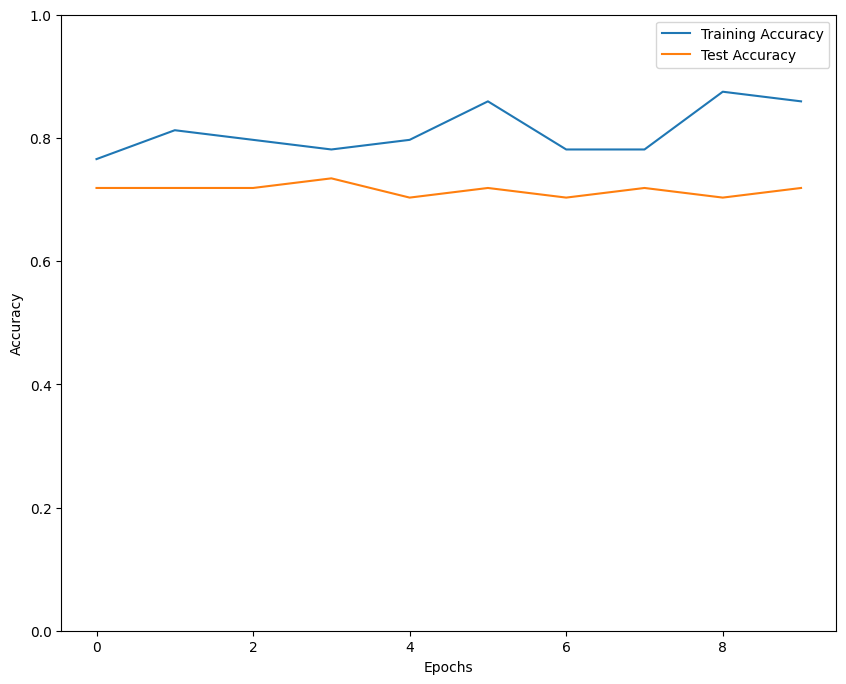

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

x_axis = np.arange(len(train_accuracies))
plt.plot(x_axis, train_accuracies, label="Training Accuracy")
plt.plot(x_axis, test_accuracies, label="Test Accuracy")

plt.legend()

plt.ylim([0, 1])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

plt.show()